In [98]:
import pandas as pd
import numpy as np

In [99]:
def preprocess_text(text):
    text = text.lower().split()
    return [word.strip("°") for word in text]


def create_transition_df(tokens_t, tokens):
    unique_words = sorted(set(tokens_t))
    num_words = len(unique_words)
    transition_df = pd.DataFrame(0, index=unique_words, columns=unique_words)

    for i in range(len(tokens) - 1):
        current_word = tokens[i]
        next_word = tokens[i + 1]
        transition_df.loc[current_word, next_word] += 1

    # Normalizar las frecuencias de transición
    transition_df = transition_df.div(transition_df.sum(axis=1), axis=0)

    return transition_df


In [100]:
def cosine_ang(m1, m2):
  np_t1 = m1.to_numpy()
  np_t2 = m2.to_numpy()

  t1_T = np_t1.transpose()
  t2_T = np_t2.transpose()

  C = np.dot(t2_T, np_t1)
  prod_int = C.trace()

  normt1 = np.sqrt((np.dot(t1_T, np_t1)).trace())
  normt2 = np.sqrt((np.dot(t2_T, np_t2)).trace())

  cos_ang = prod_int/(normt1*normt2)

  return cos_ang


In [101]:
def markov(text1,text2):
  # Preprocesamiento de textos
  tokens1 = preprocess_text(text1)
  tokens2 = preprocess_text(text2)

  tokens = tokens1 + tokens2

  # Creación de DataFrames de transición
  transition_df1 = create_transition_df(tokens,tokens1).fillna(0)
  transition_df2 = create_transition_df(tokens,tokens2).fillna(0)

  return cosine_ang(transition_df1,transition_df2)

In [102]:
data = pd.read_csv('labels_clean.csv')


In [103]:
data['ResulComp'] = data.apply(
    lambda row: markov(row['sub1'], row['sub2']), axis=1)


In [104]:
def asignar_verdict(level, result):
    if result > level:
        return 1
    else:
        return 0


In [105]:
for i in range(100):
    name = str(i/100)
    level = i/100
    data[name] = data['ResulComp'].apply(lambda x: asignar_verdict(level, x))


C:\Users\HP\AppData\Local\Temp\ipykernel_22704\2257105454.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[name] = data['ResulComp'].apply(lambda x: asignar_verdict(level, x))
C:\Users\HP\AppData\Local\Temp\ipykernel_22704\2257105454.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[name] = data['ResulComp'].apply(lambda x: asignar_verdict(level, x))
C:\Users\HP\AppData\Local\Temp\ipykernel_22704\2257105454.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

In [106]:
total_registros = len(data)
rangos = []
precisiones_rangos = []
for i in range(100):
    name = str(i/100)
    coincidencias = (data['verdict'] == data[name]).sum()
    precision = coincidencias / total_registros
    rangos.append(float(name))
    precisiones_rangos.append(precision)
    print("Precisión de", name, "es:", precision)


Precisión de 0.0 es: 0.27552140504939626
Precisión de 0.01 es: 0.27552140504939626
Precisión de 0.02 es: 0.27552140504939626
Precisión de 0.03 es: 0.27552140504939626
Precisión de 0.04 es: 0.27552140504939626
Precisión de 0.05 es: 0.27552140504939626
Precisión de 0.06 es: 0.27552140504939626
Precisión de 0.07 es: 0.27552140504939626
Precisión de 0.08 es: 0.27552140504939626
Precisión de 0.09 es: 0.27442371020856204
Precisión de 0.1 es: 0.27442371020856204
Precisión de 0.11 es: 0.27552140504939626
Precisión de 0.12 es: 0.27552140504939626
Precisión de 0.13 es: 0.27552140504939626
Precisión de 0.14 es: 0.27442371020856204
Precisión de 0.15 es: 0.27771679473106475
Precisión de 0.16 es: 0.27771679473106475
Precisión de 0.17 es: 0.28210757409440174
Precisión de 0.18 es: 0.2854006586169045
Precisión de 0.19 es: 0.29637760702524696
Precisión de 0.2 es: 0.305159165751921
Precisión de 0.21 es: 0.31174533479692645
Precisión de 0.22 es: 0.32711306256860595
Precisión de 0.23 es: 0.3413830954994512

In [107]:
max_precision = max(precisiones_rangos)
indice_max_precision = precisiones_rangos.index(max_precision)
max_precision


0.8265642151481888

In [108]:
indice = str(rangos[indice_max_precision])
indice


'0.61'

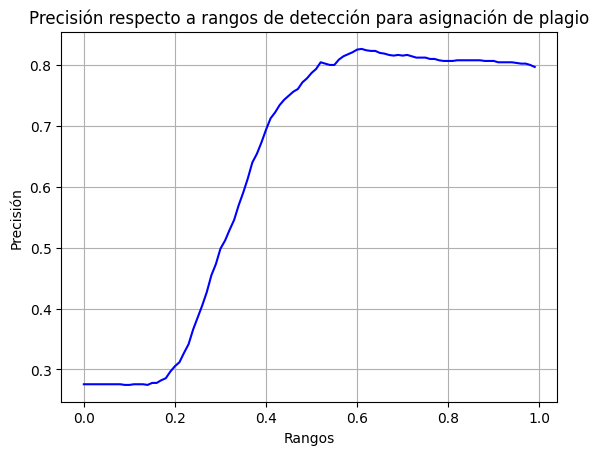

In [109]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = rangos
y = precisiones_rangos

# Crear el gráfico
plt.plot(x, y, color='blue')

# Establecer título y etiquetas de los ejes
plt.title("Precisión respecto a rangos de detección para asignación de plagio")
plt.xlabel('Rangos')
plt.ylabel('Precisión')

plt.grid(True)


# Mostrar el gráfico
plt.show()


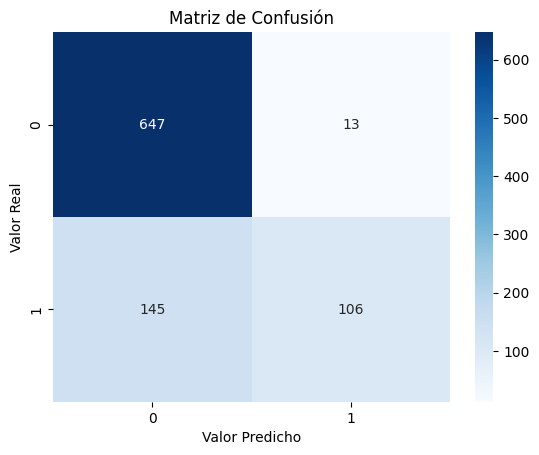

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Supongamos que 'df' es tu dataframe y 'real_values' es la columna con los valores reales,
# mientras que 'predicted_values' es la columna con los valores predichos.
real_values = data['verdict']
predicted_values = data[indice]

# Calcula la matriz de confusión
confusion = confusion_matrix(real_values, predicted_values)

# Crea un mapa de calor de la matriz de confusión
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')

# Configura los ejes y el título del gráfico
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Muestra el gráfico
plt.show()


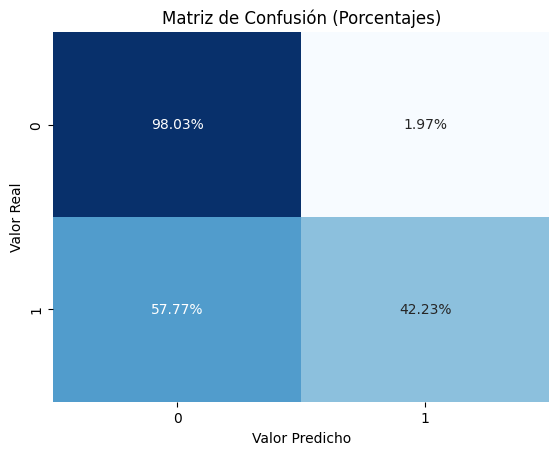

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

real_values = data['verdict']
predicted_values = data[indice]

# Calcula la matriz de confusión
confusion = confusion_matrix(real_values, predicted_values)

# Calcula los porcentajes dividiendo cada valor de la matriz por la suma de todos los valores
confusion_percent = confusion.astype(
    'float') / confusion.sum(axis=1)[:, np.newaxis]

# Crea un mapa de calor de la matriz de confusión con los porcentajes
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.2%', cbar=False)

# Configura los ejes y el título del gráfico
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Porcentajes)')

# Muestra el gráfico
plt.show()


In [112]:
data

,sub1,sub2,problem,verdict,ResulComp,0.0,0.01,0.02,0.03,0.04,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0,import java.io.PrintWriter ; import java.util....,import java.util. * ; import java.io. * ; publ...,19,0,0.290182,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,import java.util. * ; public class Soltion { p...,import java.util. * ; public class mentor1 { p...,20,0,0.451116,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,import java.io. * ; import java.util. * ; publ...,import java.io. * ; import java.util. * ; publ...,14,1,1.000000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,import java.util. * ; import java.lang. * ; im...,import java.io.OutputStream ; import java.io.I...,6,0,0.349159,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,import java.math.BigDecimal ; import java.math...,import java.util. * ; public class Sol { publi...,15,0,0.515945,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,import java.io.BufferedReader ; import java.io...,import java.io.BufferedReader ; import java.io...,8,1,0.680954,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
907,import javax.print.attribute.standard.MediaSiz...,import java.util.Scanner ; public class Menora...,4,0,0.269425,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
908,import java.io. * ; import java.util. * ; publ...,import java.io.BufferedReader ; import java.io...,17,0,0.381684,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
909,import java.util. * ; import java.io. * ; publ...,import java.io. * ; import java.util. * ; publ...,15,1,0.525489,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
datap = data


In [114]:
i = 1
precisiones = []
cortes = []
for i in range(100):
    datap = datap[datap["ResulComp"] > (i/100)]
    total_registros = len(datap)
    coincidencias = (datap['verdict'] == datap[indice]).sum()
    precision = coincidencias / total_registros
    precisiones.append(precision)
    cortes.append(i/100)
    print("coincidencias", coincidencias, "total_registros", total_registros)
    print("Precisión de", name, "es:", precision, "con corte en", (i/100))


coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.0
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.01
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.02
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.03
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.04
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.05
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.06
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.07
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.08
coincidencias 753 total_registros 910
Precisión de 0.99 es: 0.8274725274725274 con corte en 0.09
coincidencias 753 total_registr

In [115]:
max(precisiones)


1.0

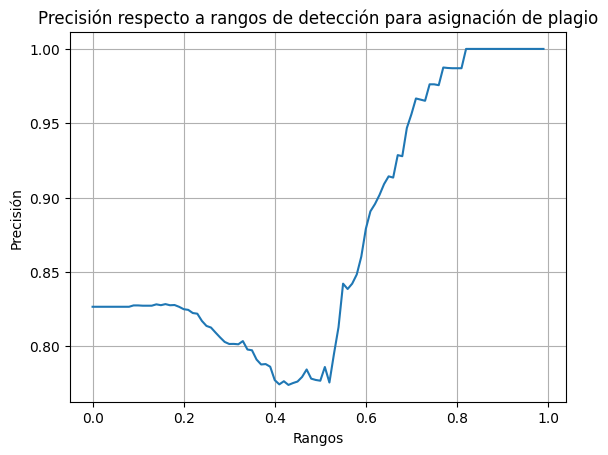

In [116]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = cortes
y = precisiones

# Crear el gráfico
plt.plot(x, y)


# Establecer título y etiquetas de los ejes
plt.title("Precisión respecto a rangos de detección para asignación de plagio")
plt.xlabel('Rangos')
plt.ylabel('Precisión')

plt.grid(True)


# Mostrar el gráfico
plt.show()
